In [1]:
import numpy as np
import pylab as plt
%matplotlib inline 

In [2]:
N = 20
R = 1
p = 0.1

In [3]:
A = np.zeros((N,N))

In [4]:
for i in range(N-1):
    A[i][i+1] = 1
    A[i-1][i] = 1
    for j in range(i):
        if np.random.rand()<p:
            A[j][i] = 1

In [5]:
A = A + A.T

In [6]:
A

array([[ 0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  

In [7]:
B = np.zeros((N,N))

In [8]:
for i in range(N-1):
    B[i][i+1] = 1
    B[i-1][i] = 1
    for j in range(i):
        if np.random.rand()<p:
            B[j][i] = 1

In [9]:
B = B + B.T

In [10]:
B

array([[ 0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  

In [11]:
XA = R*np.cos(np.linspace(-np.pi, np.pi, N))
YA = R*np.sin(np.linspace(-np.pi, np.pi, N))
XB = R*np.cos(np.linspace(-np.pi, np.pi, N)) + 3
YB = R*np.sin(np.linspace(-np.pi, np.pi, N))

(-2.0, 5.0, -1.5, 1.5)

/Users/hugocontreras/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


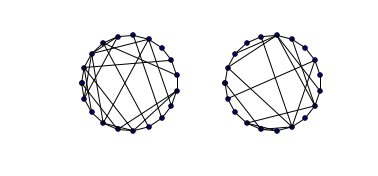

In [12]:
fig, ax = plt.subplots()
plt.scatter(XA,YA)
for ni in range(N):
    for nj in range(ni):
        if A[ni][nj] == 1.:
            plt.plot([XA[ni],XA[nj]],[YA[ni],YA[nj]],'k')

plt.scatter(XB,YB)
for ni in range(N):
    for nj in range(ni):
        if B[ni][nj] == 1.:
            plt.plot([XB[ni],XB[nj]],[YB[ni],YB[nj]],'k')
ax.set_aspect('equal')
plt.axis('off')

In [17]:
MA1 = np.array([np.concatenate((A[i],np.zeros(N))) for i in range(N)])

In [18]:
MA1.shape

(20, 40)

In [19]:
MA2 = np.zeros((N,2*N))

In [20]:
MA = np.concatenate((MA1,MA2))

In [21]:
MB2 = np.array([np.concatenate((np.zeros(N), B[i])) for i in range(N)])

In [22]:
MB1 = np.zeros((N,2*N))

In [23]:
MB = np.concatenate((MB1,MB2))

In [24]:
M = MA + MB

(0.0, 40.0, 0.0, 40.0)

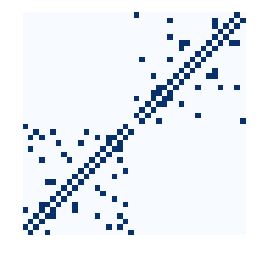

In [25]:
fig2, ax2 = plt.subplots()
heatmap = ax2.pcolor(M, cmap=plt.cm.Blues)
ax2.set_aspect('equal')
plt.axis('off')

In [26]:
L = np.diag(M.sum(axis=1))-M

In [27]:
E_L = np.around(np.linalg.eigvals(L), decimals = 3)

In [30]:
M_C = M[:][:]

In [31]:
M_C[5][35] = 1
M_C[35][5] = 1

In [ ]:
fig, ax = plt.subplots()
plt.scatter(XA,YA)
for ni in range(N):
    for nj in range(ni):
        if A[ni][nj] == 1.:
            plt.plot([XA[ni],XA[nj]],[YA[ni],YA[nj]],'k')

plt.scatter(XB,YB)
for ni in range(N):
    for nj in range(ni):
        if B[ni][nj] == 1.:
            plt.plot([XB[ni],XB[nj]],[YB[ni],YB[nj]],'k')

plt.plot([X[5],X[35]],[Y[5],Y[35]])

ax.set_aspect('equal')
plt.axis('off')

(0.0, 40.0, 0.0, 40.0)

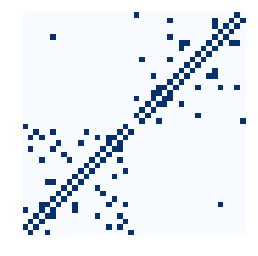

In [32]:
fig3, ax3 = plt.subplots()
heatmap = ax3.pcolor(M_C, cmap=plt.cm.Blues)
ax3.set_aspect('equal')
plt.axis('off')

In [33]:
L_C = np.diag(M_C.sum(axis=1))-M_C

In [34]:
E_L_C = np.around(np.linalg.eigvals(L_C), decimals = 3)

(array([ 4.,  7.,  6.,  4.,  4.,  5.,  4.,  3.,  2.,  1.]),
 array([ 0.    ,  0.8913,  1.7826,  2.6739,  3.5652,  4.4565,  5.3478,
         6.2391,  7.1304,  8.0217,  8.913 ]),
 <a list of 10 Patch objects>)

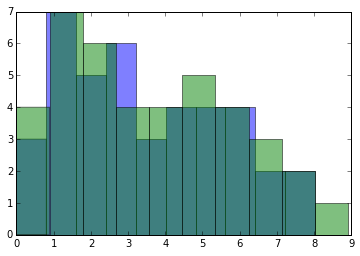

In [35]:
plt.hist(E_L, alpha = 0.5)
plt.hist(E_L_C, alpha = 0.5)